In [7]:
import glob 
from collections import defaultdict
from util_kitti import kitti_label_file_parser, kitti_calib_file_parser # , P2_tf, P2
import matplotlib.pyplot as plt
import statistics 
import numpy as np
import cv2
from util_kitti import init_img_plt, draw_birdeyes, draw_corner_2D, kitti_calib_file_parser
import os 


LABEL_DIR = "/home/lab530/KenYu/kitti/training/label_2/"


# Is all calib txt the same? NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

In [19]:
# import os
# import pprint 
# import cv2
# P2_dict = {
#             '[[7.215377e+02 0.000000e+00 6.095593e+02 4.485728e+01]\n ' +
#              '[0.000000e+00 7.215377e+02 1.728540e+02 2.163791e-01]\n ' +
#              '[0.000000e+00 0.000000e+00 1.000000e+00 2.745884e-03]]':'A',
#             '[[ 7.070493e+02  0.000000e+00  6.040814e+02  4.575831e+01]\n ' +
#              '[ 0.000000e+00  7.070493e+02  1.805066e+02 -3.454157e-01]\n ' +
#              '[ 0.000000e+00  0.000000e+00  1.000000e+00  4.981016e-03]]':'B',
#             '[[ 7.183351e+02  0.000000e+00  6.003891e+02  4.450382e+01]\n ' + 
#              '[ 0.000000e+00  7.183351e+02  1.815122e+02 -5.951107e-01]\n ' + 
#              '[ 0.000000e+00  0.000000e+00  1.000000e+00  2.616315e-03]]':'C',
#             '[[ 7.188560e+02  0.000000e+00  6.071928e+02  4.538225e+01]\n ' +
#              '[ 0.000000e+00  7.188560e+02  1.852157e+02 -1.130887e-01]\n ' +
#              '[ 0.000000e+00  0.000000e+00  1.000000e+00  3.779761e-03]]':'D'}

# shape_dict_inv  = {(375, 1242, 3): 'A',
#                    (370, 1224, 3): 'B',
#                    (374, 1238, 3): 'C',
#                    (376, 1241, 3): 'D'}
# shape_dict = {'A': (375, 1242, 3),
#               'B': (370, 1224, 3),
#               'C': (374, 1238, 3),
#               'D': (376, 1241, 3)}

# type_dict_inv = {'A':[], 'B':[], 'C':[], 'D':[]}
# type_dict     = {}
# for fn in os.listdir("/home/lab530/KenYu/kitti/training/calib/"):
#     name = fn.split('.')[0]
#     P2 = kitti_calib_file_parser(f"/home/lab530/KenYu/kitti/training/calib/{fn}")
#     img = cv2.imread(f"/home/lab530/KenYu/kitti/training/image_2/{name}.png")

#     if P2_dict[str(P2)] == shape_dict_inv[img.shape]:
#         type_dict[name] = P2_dict[str(P2)]
#         type_dict_inv[ P2_dict[str(P2)] ].append(name)
#     else:
#         print(P2_dict[str(P2)])
#         print(shape_dict_inv[img.shape])
#         raise ValueError

# # pprint.pprint(type_dict_inv)
# for i in type_dict_inv:
#     print(f"{i}:{len(type_dict_inv[i])}")
# # A:6057
# # B:770
# # C:358
# # D:296
# pprint.pprint(type_dict)

# import pickle
# with open(f"type_dict.pkl", 'wb') as f:
#     pickle.dump(type_dict, f)
# print(f"Write type_dict to type_dict.pkl")

A:6057
B:770
C:358
D:296
{'000000': 'B',
 '000001': 'A',
 '000002': 'A',
 '000003': 'A',
 '000004': 'A',
 '000005': 'A',
 '000006': 'C',
 '000007': 'A',
 '000008': 'A',
 '000009': 'A',
 '000010': 'A',
 '000011': 'A',
 '000012': 'A',
 '000013': 'A',
 '000014': 'A',
 '000015': 'C',
 '000016': 'A',
 '000017': 'A',
 '000018': 'A',
 '000019': 'A',
 '000020': 'A',
 '000021': 'A',
 '000022': 'A',
 '000023': 'A',
 '000024': 'D',
 '000025': 'A',
 '000026': 'A',
 '000027': 'A',
 '000028': 'B',
 '000029': 'A',
 '000030': 'A',
 '000031': 'A',
 '000032': 'A',
 '000033': 'A',
 '000034': 'A',
 '000035': 'A',
 '000036': 'A',
 '000037': 'D',
 '000038': 'A',
 '000039': 'A',
 '000040': 'A',
 '000041': 'A',
 '000042': 'A',
 '000043': 'A',
 '000044': 'A',
 '000045': 'A',
 '000046': 'A',
 '000047': 'D',
 '000048': 'C',
 '000049': 'A',
 '000050': 'A',
 '000051': 'A',
 '000052': 'A',
 '000053': 'A',
 '000054': 'B',
 '000055': 'A',
 '000056': 'A',
 '000057': 'A',
 '000058': 'B',
 '000059': 'A',
 '000060': 'A',

[[7.38854605e+02 0.00000000e+00 6.24188723e+02 4.59338547e+01]
 [0.00000000e+00 7.43613733e+02 1.78142609e+02 2.22999395e-01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.74588400e-03]]
[[ 7.33802517e+02  0.00000000e+00  6.26938534e+02  4.74897055e+01]
 [ 0.00000000e+00  7.39397961e+02  1.88765072e+02 -3.61219033e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  4.98101600e-03]]
[[ 7.37541921e+02  0.00000000e+00  6.16442284e+02  4.56937617e+01]
 [ 0.00000000e+00  7.42705111e+02  1.87670126e+02 -6.15300239e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  2.61631500e-03]]
[[ 7.34150809e+02  0.00000000e+00  6.20111796e+02  4.63478298e+01]
 [ 0.00000000e+00  7.41446962e+02  1.91036338e+02 -1.16642656e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  3.77976100e-03]]


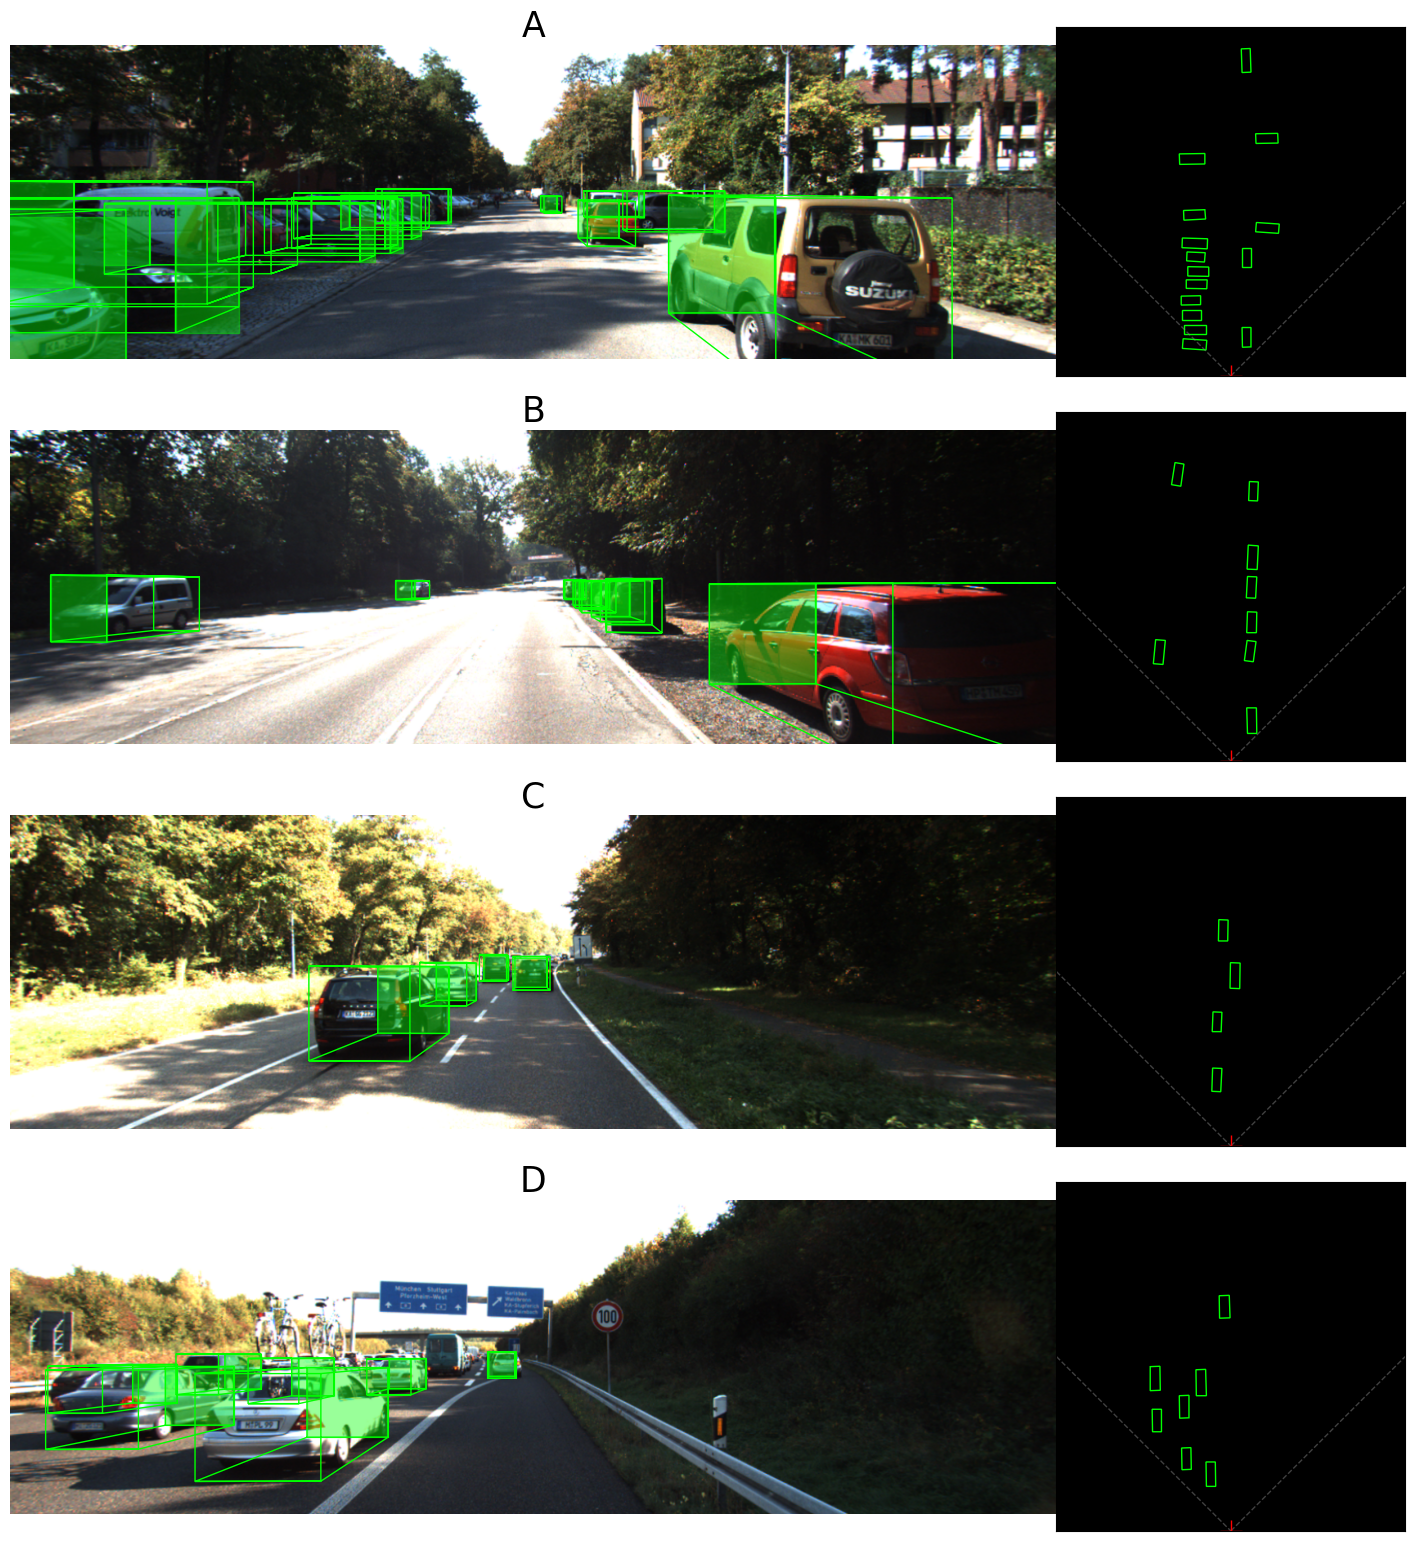

In [16]:
img_dict = {'A': '000169', 'B': '000338', 'C': '000259', 'D': '003563'}
mappppp = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}


imgs = []
P2s = []
for type in img_dict:
    img = cv2.imread(f"/home/lab530/KenYu/kitti/training/image_2/{img_dict[type]}.png")
    P2 = kitti_calib_file_parser(f"/home/lab530/KenYu/kitti/training/calib/{img_dict[type]}.txt")
    
    
    img_ori_h, img_ori_w, _ = img.shape
    # Resize
    P2[0, :] *= 1280  / img_ori_w
    P2[1, :] *= 384   / img_ori_h
    print(P2)
    img = cv2.resize(img, (1280, 384))
    
    imgs.append(img)
    P2s.append(P2)

axs = init_img_plt(imgs, titles = ['A', 'B', 'C', 'D'])

ANO_DIR = "/home/lab530/KenYu/kitti/training/label_2/"

for i in range(4):
    objs = kitti_label_file_parser(os.path.join(ANO_DIR, f"{img_dict[mappppp[i] ]}.txt"), tf_matrix = P2s[i])

    # Draw annotation on image
    for obj in objs:
        if obj.category == "Car":
            draw_birdeyes(axs[i][1], obj, color = (0,1,0), title = "123", is_print_confident = False)
            draw_corner_2D(axs[i][0], obj.corner_2D, color = (0,1,0), is_draw_front = True, )

In [10]:
objs = []
for fn in glob.glob(LABEL_DIR + "*.txt"):
    objs += kitti_label_file_parser(fn)
print(f"Number of total ground trues = {len(objs)}")
print("=====================================")

# Show category
print("Categories: ")
cls_dict = defaultdict(int)
for obj in objs:
    cls_dict[obj.category] += 1

for cls in cls_dict:
    print(f"{cls}: {cls_dict[cls]}")
print("=====================================")

# Show truncated objects
print("Truncated Objects:")
N_BIN_TRUNCATED = 10
x_truncated = []
not_truncated_count = 0 
for obj in objs:
    if obj.category == "Car":
        if obj.truncated == 0.0: # Not truncated
            not_truncated_count += 1
        else:
            x_truncated.append(obj.truncated)
print(f"Number of truncated object = {len(x_truncated)}, {round(100*len(x_truncated)/len(objs), 2)}%")

print("=====================================")
print("Occluded objects:")
occ_dict = defaultdict(int)
for obj in objs:
    if obj.category == "Car":
        occ_dict[obj.occluded] += 1
for i in occ_dict:
    print(f"{i}: {occ_dict[i]}  ({round(100*occ_dict[i]/cls_dict['Car'],2)}%)")
print("=====================================")
print("Dimension: ")
avg_h, avg_w, avg_l  = 0, 0, 0

for obj in objs:
    if obj.category == "Car":
        avg_h += obj.h / cls_dict['Car']
        avg_w += obj.w / cls_dict['Car']
        avg_l += obj.l / cls_dict['Car']
print(f"Average height = {round(avg_h, 3)}")
print(f"Average width  = {round(avg_w, 3)}")
print(f"Average length = {round(avg_l, 3)}")

print("=====================================")
avg_y_3d = 0
for obj in objs:
    if obj.category == "Car":
        avg_y_3d += obj.y3d / cls_dict['Car']
print(f"Average height = {round(avg_y_3d, 3)}")

# Show rotation_y histogram
N_BIN_ROTATION_Y = 100
x_rotation_y = []
for obj in objs:
    if obj.category == "Car":
        x_rotation_y.append(obj.rot_y)

# Show x_3d 
N_BIN_X_3D = 100
x_x_3d = []
for obj in objs:
    if obj.category == "Car":
        x_x_3d.append(obj.x3d)

# Show y_3d 
N_BIN_Y_3D = 100
x_y_3d = []
for obj in objs:
    if obj.category == "Car":
        x_y_3d.append(obj.y3d)

# Show z_3d 
N_BIN_Z_3D = 100
x_z_3d = []
for obj in objs:
    if obj.category == "Car":
        x_z_3d.append(obj.z3d)

# Show area 
# N_BIN_AREA_3D = 100
area_z_bin = [[] for _ in range(10)]
for obj in objs:
    if obj.category == "Car":
        area_z_bin[ int(obj.z3d/10) ].append(obj.area)
new_bin = []
for i in area_z_bin:
    try: 
        new_bin.append(sum(i) / len(i))
    except ZeroDivisionError:
        new_bin.append(0)


# Draw histogram
fig, ax = plt.subplots(3, 2, figsize=(30, 20))
fig.set_facecolor('white')
fig.tight_layout()

ax[0, 0].set_title("Car rotation_y histogram", fontsize=25)
ax[0, 0].hist(x_rotation_y, bins=N_BIN_ROTATION_Y)
ax[0, 1].set_title("Car truncated histogram(Only show truncated)", fontsize=25)
ax[0, 1].hist(x_truncated, bins=N_BIN_TRUNCATED)
ax[1, 0].set_title("Car x_3d histogram", fontsize=25)
ax[1, 0].hist(x_x_3d, bins=N_BIN_X_3D)
ax[1, 1].set_title("Car y_3d histogram", fontsize=25)
ax[1, 1].hist(x_y_3d, bins=N_BIN_Y_3D)
ax[2, 0].set_title("Car z_3d histogram", fontsize=25)
ax[2, 0].hist(x_z_3d, bins=N_BIN_Z_3D)
ax[2, 1].set_title("Car area histogram", fontsize=25)
ax[2, 1].plot(list(range(0, 100 ,10)), new_bin)

print(f"Mean of y_3d = {statistics.mean(x_y_3d)}")
print(f"Mean of z_3d = {statistics.mean(x_z_3d)}")

print(f"Std of y_3d = {statistics.stdev(x_y_3d)}")
print(f"Std of z_3d = {statistics.stdev(x_z_3d)}")


TypeError: kitti_label_file_parser() missing 1 required positional argument: 'tf_matrix'

## Calcualate alpha angle


In [ ]:
import math
for obj in objs:
    if obj.category == "Car":
        x_x_3d.append(obj.x3d)
        alpha_my = obj.rot_y + math.atan2(obj.z3d, obj.x3d) - math.pi/2

        # Constraint alpha_my in [-pi, pi]
        if alpha_my > math.pi: alpha_my -= 2*math.pi
        elif alpha_my < -math.pi: alpha_my += 2*math.pi

        if abs(alpha_my - obj.alpha) > 0.3:
            print(obj.alpha)
            print(alpha_my)

-3.14
3.13597033102729
3.14
-3.1404460190377588
-3.07
3.1221185126271536
3.13
-3.1377173578538073
-3.14
3.138933319966662


# Check relationship between u, y, z

In [ ]:
P2 = kitti_calib_file_parser(f"/home/lab530/KenYu/kitti/training/calib/000000.txt")
for obj in objs:
    if obj.category == "Car":
        y3d = obj.cz * (obj.cy - P2[1, 2] ) / P2[1, 1] + obj.h/2
        print(f"{y3d}, {obj.y3d}")
        # print(abs(y3d - obj.y3d))

1.5162824047985985, 1.54
1.3331970244722209, 1.54
1.2104247340534355, 1.86
2.5544991599810185, 2.98
1.2698332788324185, 1.48
0.8053944200427974, 1.26
1.5531197441467883, 1.69
1.0188433110890087, 1.49
1.7489521691276217, 2.48
0.9225781906794432, 1.33
1.5136897722905118, 1.63
1.5019732173062978, 1.59
1.3042772306190908, 1.52
1.2192581180904445, 1.48
1.4230021328288789, 1.61
1.2599284970866478, 1.53
1.53588908710491, 1.65
1.0230622205766513, 1.44
1.31435512052012, 1.59
1.5756315449504945, 1.66
1.4345590737663807, 1.96
1.6397059440058368, 1.87
1.3364220301401413, 2.06
1.5595993319209365, 1.59
1.7766928584968058, 1.81
1.5205944605491668, 1.62
1.7770355460576313, 1.86
1.8352841420183377, 1.99
2.000057851574376, 2.37
1.6070969774175095, 1.72
1.5760773497904126, 1.76
1.5440699678440613, 1.83
1.224338503574173, 1.61
1.2755440956029025, 1.79
1.9788378051080253, 2.04
1.7764673749272735, 2.21
0.8338061191987105, 1.52
1.4235549910241982, 1.45
1.8028497290290313, 1.88
1.433080164162762, 1.52
1.45674